# Importing Laibraries

In [371]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Loading Tips Data Set

In [372]:
df=sns.load_dataset('tips')

In [373]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Data Preprocessing & EDA

In [374]:
df.shape

(244, 7)

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [376]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [377]:
df.duplicated().sum()

1

In [378]:
df.drop_duplicates(inplace=True)

In [379]:
df.shape

(243, 7)

In [380]:
df.total_bill.unique()

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 13.81, 11.02, 17.59,
       20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28,
       14.73, 10.51, 27.2 , 22.76, 17.29, 19.44, 16.66, 10.07, 32.68,
       15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49,  5.75,
       16.32, 22.75, 40.17, 27.28, 12.03, 12.46, 11.35, 15.38, 44.3 ,
       22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
       38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69,
       13.42, 14.26, 15.95, 12.48, 29.8 ,  8.52, 14.52, 11.38, 22.82,
       19.08, 20.27,

In [381]:
df.tip.unique()

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  4.3 ,  1.45,
        2.5 ,  2.45,  3.27,  3.6 ,  3.07,  2.31,  2.24,  2.54,  3.06,
        1.32,  5.6 ,  6.  ,  2.05,  2.6 ,  5.2 ,  1.56,  4.34,  3.51,
        1.5 ,  1.76,  6.73,  3.21,  1.98,  3.76,  2.64,  3.15,  2.47,
        1.  ,  2.01,  2.09,  1.97,  3.14,  2.2 ,  1.25,  3.08,  4.  ,
        2.71,  3.4 ,  1.83,  2.03,  5.17,  5.85,  3.25,  4.73,  3.48,
        1.64,  4.06,  4.29,  2.55,  5.07,  1.8 ,  2.92,  1.68,  2.52,
        4.2 ,  1.48,  2.18,  2.83,  6.7 ,  2.3 ,  1.36,  1.63,  1.73,
        2.74,  5.14,  3.75,  2.61,  4.5 ,  1.61, 10.  ,  3.16,  5.15,
        3.11,  3.55,  3.68,  5.65,  6.5 ,  4.19,  2.56,  2.02,  1.44,
        3.41,  5.16,  9.  ,  1.1 ,  3.09,  1.92,  1.58,  2.72,  2.88,
        3.39,  1.47,  1.17,  4.67,  5.92,  1.75])

In [382]:
df.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [383]:
df.smoker.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [384]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [385]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [386]:
value_count=df.sex.value_counts()
value_count

Male      157
Female     86
Name: sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

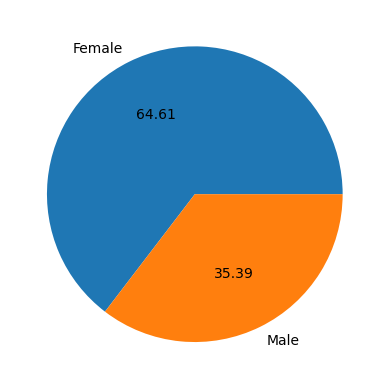

In [387]:
plt.pie(value_count,labels=["Female","Male"],autopct='%0.2f')
plt.show

In [388]:
value_count=df.smoker.value_counts()
value_count

No     151
Yes     92
Name: smoker, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

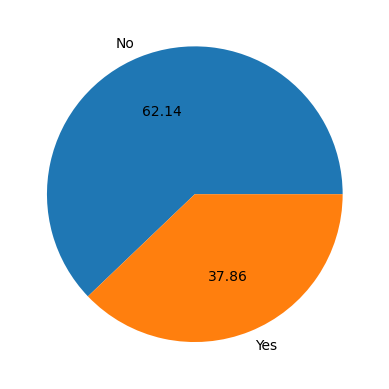

In [389]:
plt.pie(value_count,labels=["No","Yes"],autopct='%0.2f')
plt.show

In [390]:
value_count=df.day.value_counts()
value_count

Sat     87
Sun     76
Thur    61
Fri     19
Name: day, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

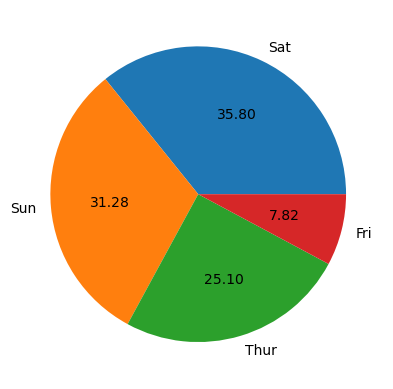

In [391]:
plt.pie(value_count,labels=['Sat','Sun','Thur','Fri'],autopct='%0.2f')
plt.show

In [392]:
value_count=df.time.value_counts()
value_count

Dinner    176
Lunch      67
Name: time, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

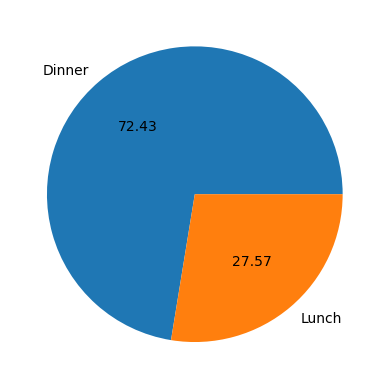

In [393]:
plt.pie(value_count,labels=['Dinner','Lunch'],autopct='%0.2f')
plt.show

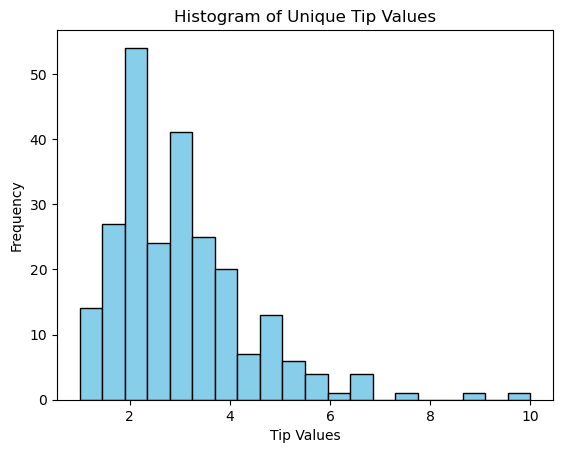

In [394]:
plt.hist(df['tip'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Unique Tip Values')
plt.xlabel('Tip Values')
plt.ylabel('Frequency')
plt.show()

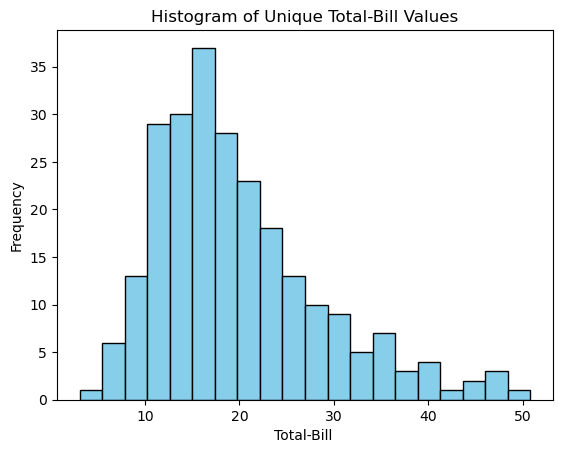

In [395]:
plt.hist(df['total_bill'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Unique Total-Bill Values')
plt.xlabel('Total-Bill ')
plt.ylabel('Frequency')
plt.show()

# Data Encoding

In [396]:
le=LabelEncoder()

In [397]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['day']=le.fit_transform(df['day'])
df['time']=le.fit_transform(df['time'])

In [398]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


# Data Seperation

In [399]:
x=df.drop('total_bill',axis=1)

In [400]:
y=df.total_bill

In [401]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Data Standardization

In [402]:
scalar=StandardScaler()

In [403]:
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.fit_transform(x_test)

In [404]:
x_test_scaled.shape

(49, 6)

# Data Modeling With Neural Network Architecture

In [405]:
model=tf.keras.Sequential([
    
    #input layer
    tf.keras.layers.InputLayer(input_shape=x_train_scaled.shape[1:]),
    
    #hidden layers
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    
    #outputlayer
    tf.keras.layers.Dense(1)
])

In [406]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [407]:
early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [408]:
history=model.fit(x_train_scaled,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
5/5 [==============================] - 1s 36ms/step - loss: 453.6389 - val_loss: 420.5383
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 444.8652 - val_loss: 412.6931
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 435.5094 - val_loss: 403.9510
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 425.5276 - val_loss: 394.4052
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 414.4206 - val_loss: 383.8777
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 402.3158 - val_loss: 372.3660
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 388.8340 - val_loss: 359.9398
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 374.7294 - val_loss: 346.3699
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 359.0245 - val_loss: 331.6478
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 341.7161 -

Epoch 82/100
5/5 [==============================] - 0s 10ms/step - loss: 28.8629 - val_loss: 45.1571
Epoch 83/100
5/5 [==============================] - 0s 12ms/step - loss: 28.7626 - val_loss: 45.1088
Epoch 84/100
5/5 [==============================] - 0s 11ms/step - loss: 28.6644 - val_loss: 45.0718
Epoch 85/100
5/5 [==============================] - 0s 10ms/step - loss: 28.5542 - val_loss: 45.0300
Epoch 86/100
5/5 [==============================] - 0s 10ms/step - loss: 28.4759 - val_loss: 45.0455
Epoch 87/100
5/5 [==============================] - 0s 13ms/step - loss: 28.4095 - val_loss: 45.0139
Epoch 88/100
5/5 [==============================] - 0s 10ms/step - loss: 28.3286 - val_loss: 45.0021
Epoch 89/100
5/5 [==============================] - 0s 10ms/step - loss: 28.2396 - val_loss: 44.9983
Epoch 90/100
5/5 [==============================] - 0s 10ms/step - loss: 28.2018 - val_loss: 44.9822
Epoch 91/100
5/5 [==============================] - 0s 8ms/step - loss: 28.1209 - val_loss:

# Graph Representation Of Training Loss & Validation Loss

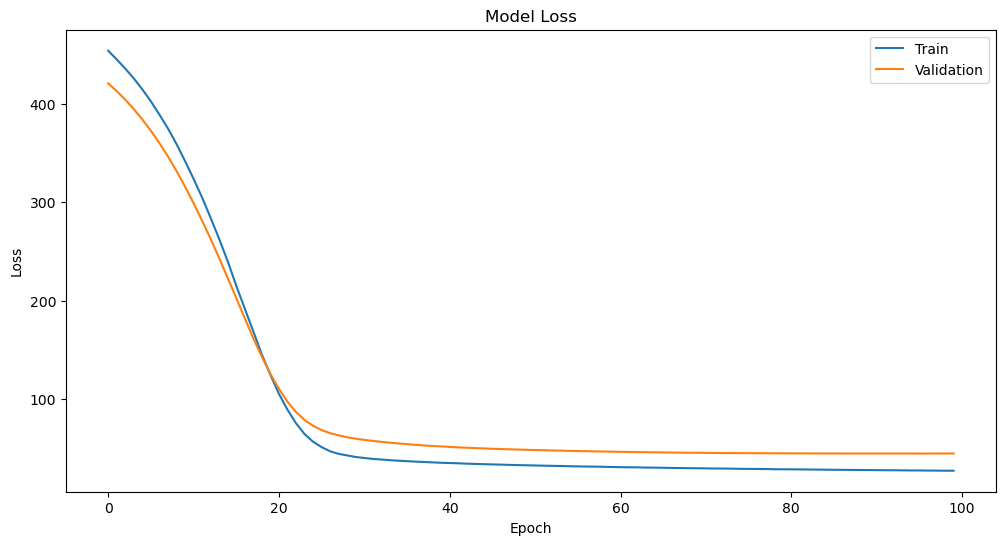

In [409]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

# Calculation of Test Loss

In [410]:
loss=model.evaluate(x_test_scaled,y_test)
print(f"Test loss:{loss}")

2/2 [==============================] - 0s 8ms/step - loss: 45.7876
Test loss:45.78762435913086
